# Building user-based recommendation model for Amazon

In [1]:
# Import all important libraty
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
Amazon=pd.read_csv('Amazon_Movies_and_TV_Ratings.csv')

# Exploratory Data Analysis:

In [3]:
# show the first five index
Amazon.head()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
0,A3R5OBKS7OM2IR,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AH3QC2PC1VTGP,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A3LKP6WPMP9UKX,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AVIY68KEPQ5ZD,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A1CV1WROP5KTTW,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# show the last five index
Amazon.tail()

,user_id,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
4843,A1IMQ9WMFYKWH5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4844,A1KLIKPUF5E88I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4845,A5HG6WFZLO10D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4846,A3UU690TWXCG1X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4847,AI4J762YI6S06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [5]:
Amazon.isnull().sum()

user_id        0
Movie1      4847
Movie2      4847
Movie3      4847
Movie4      4846
            ... 
Movie202    4842
Movie203    4847
Movie204    4840
Movie205    4813
Movie206    4835
Length: 207, dtype: int64

In [6]:
Amazon.describe()

,Movie1,Movie2,Movie3,Movie4,Movie5,Movie6,Movie7,Movie8,Movie9,Movie10,...,Movie197,Movie198,Movie199,Movie200,Movie201,Movie202,Movie203,Movie204,Movie205,Movie206
count,1.0,1.0,1.0,2.0,29.000000,1.0,1.0,1.0,1.0,1.0,...,5.000000,2.0,1.0,8.000000,3.000000,6.000000,1.0,8.000000,35.000000,13.000000
mean,5.0,5.0,2.0,5.0,4.103448,4.0,5.0,5.0,5.0,5.0,...,3.800000,5.0,5.0,4.625000,4.333333,4.333333,3.0,4.375000,4.628571,4.923077
std,NaN,NaN,NaN,0.0,1.496301,NaN,NaN,NaN,NaN,NaN,...,1.643168,0.0,NaN,0.517549,1.154701,1.632993,NaN,1.407886,0.910259,0.277350
min,5.0,5.0,2.0,5.0,1.000000,4.0,5.0,5.0,5.0,5.0,...,1.000000,5.0,5.0,4.000000,3.000000,1.000000,3.0,1.000000,1.000000,4.000000
25%,5.0,5.0,2.0,5.0,4.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,4.000000,4.000000,5.000000,3.0,4.750000,5.000000,5.000000
50%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,4.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
75%,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000
max,5.0,5.0,2.0,5.0,5.000000,4.0,5.0,5.0,5.0,5.0,...,5.000000,5.0,5.0,5.000000,5.000000,5.000000,3.0,5.000000,5.000000,5.000000


In [7]:
# Check the data numbers of row and column
Amazon.shape

(4848, 207)

DataFrame.T

Transpose index and columns.


Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa. The property T is an accessor to the method transpose().



In [8]:
Amazon.describe().T

,count,mean,std,min,25%,50%,75%,max
Movie1,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie2,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Movie3,1.0,2.000000,NaN,2.0,2.00,2.0,2.0,2.0
Movie4,2.0,5.000000,0.000000,5.0,5.00,5.0,5.0,5.0
Movie5,29.0,4.103448,1.496301,1.0,4.00,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
Movie202,6.0,4.333333,1.632993,1.0,5.00,5.0,5.0,5.0
Movie203,1.0,3.000000,NaN,3.0,3.00,3.0,3.0,3.0
Movie204,8.0,4.375000,1.407886,1.0,4.75,5.0,5.0,5.0
Movie205,35.0,4.628571,0.910259,1.0,5.00,5.0,5.0,5.0


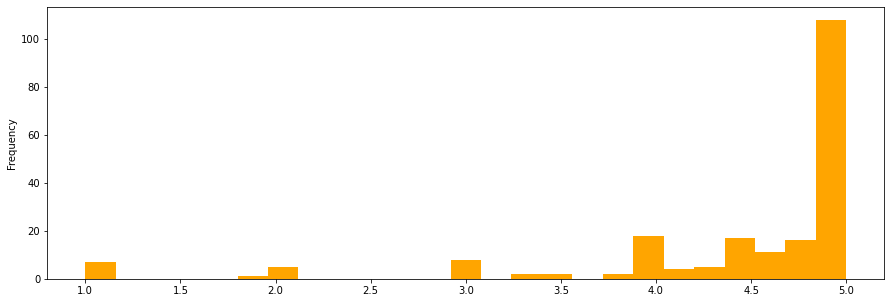

In [9]:
# ploting the mean frequency
plt.figure(figsize=(15,5))
means=Amazon.describe().T['mean']
means.plot(bins=25, kind='hist',color = 'orange')
plt.show()

<AxesSubplot:ylabel='Frequency'>

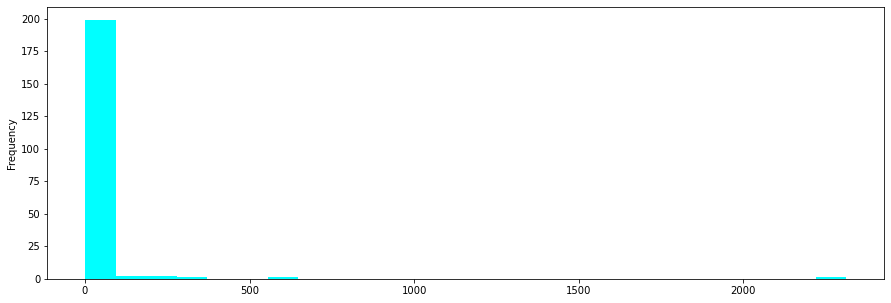

In [10]:
# count frequency
counts=Amazon.describe().T['count']
plt.figure(figsize=(15,5))
counts.plot(bins=25, kind='hist', color = 'cyan')

In [11]:
# Movie that has maxmium view
Amazon.describe().T['count'].sort_values(ascending=False)[:1].to_frame()

,count
Movie127,2313.0


In [12]:
# Movie that has maxmium ratings
Amazon.drop('user_id',axis=1).sum().sort_values(ascending=False)[:1].to_frame()

,0
Movie127,9511.0


In [13]:
# Average rating of each movie
Amazon.drop('user_id',axis=1).mean()

Movie1      5.000000
Movie2      5.000000
Movie3      2.000000
Movie4      5.000000
Movie5      4.103448
              ...   
Movie202    4.333333
Movie203    3.000000
Movie204    4.375000
Movie205    4.628571
Movie206    4.923077
Length: 206, dtype: float64

In [14]:
# top 5 movies with the maximum rating
Amazon.drop('user_id',axis=1).mean().sort_values(ascending=False)[:5].to_frame()

,0
Movie1,5.0
Movie66,5.0
Movie76,5.0
Movie75,5.0
Movie74,5.0


In [15]:
# Top 5 movies with least audience
Amazon.describe().T['count'].sort_values(ascending=True)[:5].to_frame()

,count
Movie1,1.0
Movie71,1.0
Movie145,1.0
Movie69,1.0
Movie68,1.0


# User based Model building

In [16]:
#importing libiraies for model building
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise import SVD
from surprise.model_selection import train_test_split

In [17]:
movie_data = Amazon.melt(id_vars = Amazon.columns[0],value_vars=Amazon.columns[1:],var_name="Movies",value_name="Rating")
movie_data

,user_id,Movies,Rating
0,A3R5OBKS7OM2IR,Movie1,5.0
1,AH3QC2PC1VTGP,Movie1,NaN
2,A3LKP6WPMP9UKX,Movie1,NaN
3,AVIY68KEPQ5ZD,Movie1,NaN
4,A1CV1WROP5KTTW,Movie1,NaN
...,...,...,...
998683,A1IMQ9WMFYKWH5,Movie206,5.0
998684,A1KLIKPUF5E88I,Movie206,5.0
998685,A5HG6WFZLO10D,Movie206,5.0
998686,A3UU690TWXCG1X,Movie206,5.0


In [18]:
# creating a dataset for training and testing
rd = Reader(rating_scale=(-1,10))
data = Dataset.load_from_df(movie_data.fillna(0),reader=rd)
data

In [19]:
train_data,test_data = train_test_split(data,test_size=0.20)

In [20]:
# Using SVD (Singular Value Descomposition)
svd = SVD()

In [21]:
svd.fit(train_data)

In [22]:
pred = svd.test(test_data)

In [23]:
accuracy.rmse(pred)

RMSE: 0.2858


0.2857922578332331

In [24]:
accuracy.mae(pred)


MAE:  0.0413


0.04126502328661636

In [25]:
u_id='AH3QC2PC1VTGP'
mv = 'Movie206'
r_id = 5.0
svd.predict(u_id, mv, r_ui=r_id, verbose= True)

user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 0.00   {'was_impossible': False}


Prediction(uid='AH3QC2PC1VTGP', iid='Movie206', r_ui=5.0, est=0.0030437283198732276, details={'was_impossible': False})

In [26]:
from surprise.model_selection import cross_validate

In [27]:
cross_validate(svd, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.2821  0.2826  0.2823  0.2823  0.0002  
MAE (testset)     0.0425  0.0430  0.0423  0.0426  0.0003  
Fit time          49.46   48.78   49.45   49.23   0.32    
Test time         3.80    3.23    3.21    3.41    0.27    


{'test_rmse': array([0.28207532, 0.28261916, 0.28233258]),
 'test_mae': array([0.04252913, 0.04301792, 0.04231648]),
 'fit_time': (49.458343505859375, 48.78299260139465, 49.44995594024658),
 'test_time': (3.8028900623321533, 3.230132818222046, 3.211165189743042)}

In [28]:
def repeat(ml_type,dframe,min_,max_):
    rd = Reader()
    data = Dataset.load_from_df(dframe,reader=rd)
    print(cross_validate(ml_type, data, measures = ['RMSE', 'MAE'], cv = 3, verbose = True))
    print("#"*10)
    u_id = 'AH3QC2PC1VTGP'
    m_id = 'Movie206'
    ra_u = 5.0
    print(ml_type.predict(u_id,mv,r_ui=ra_u,verbose=True))
    print("#"*10)
    print()

In [29]:
Amazon= Amazon.iloc[:3000, :50]
movie_data = Amazon.melt(id_vars = Amazon.columns[0],value_vars=Amazon.columns[1:],var_name="Movies",value_name="Rating")

In [30]:
repeat(SVD(),movie_data.fillna(0),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.mean()),-1,10)
repeat(SVD(),movie_data.fillna(movie_data.median()),-1,10)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0284  1.0305  1.0282  1.0290  0.0010  
MAE (testset)     1.0121  1.0130  1.0121  1.0124  0.0005  
Fit time          7.13    6.68    7.09    6.97    0.20    
Test time         0.64    0.36    0.64    0.55    0.13    
{'test_rmse': array([1.02838361, 1.03045538, 1.02815583]), 'test_mae': array([1.01206562, 1.01304278, 1.01207077]), 'fit_time': (7.127829313278198, 6.6831605434417725, 7.087162971496582), 'test_time': (0.6356163024902344, 0.36379194259643555, 0.6386349201202393)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 1.00   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 1.00   {'was_impossible': False}
##########



C:\Users\birba\AppData\Local\Temp/ipykernel_14268/127061997.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repeat(SVD(),movie_data.fillna(movie_data.mean()),-1,10)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0624  0.0584  0.0495  0.0568  0.0054  
MAE (testset)     0.0072  0.0078  0.0073  0.0075  0.0002  
Fit time          7.02    7.25    6.75    7.01    0.20    
Test time         0.36    0.66    0.36    0.46    0.14    
{'test_rmse': array([0.06235366, 0.05840937, 0.04954167]), 'test_mae': array([0.00721641, 0.00779196, 0.00734321]), 'fit_time': (7.019009351730347, 7.252922534942627, 6.753688335418701), 'test_time': (0.35877394676208496, 0.6566245555877686, 0.3567943572998047)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.54   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 4.54   {'was_impossible': False}
##########



C:\Users\birba\AppData\Local\Temp/ipykernel_14268/127061997.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  repeat(SVD(),movie_data.fillna(movie_data.median()),-1,10)


Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0599  0.0626  0.0646  0.0623  0.0019  
MAE (testset)     0.0056  0.0056  0.0056  0.0056  0.0000  
Fit time          8.45    6.77    7.19    7.47    0.71    
Test time         0.35    0.61    0.34    0.43    0.12    
{'test_rmse': array([0.05985562, 0.06258932, 0.06459052]), 'test_mae': array([0.00556815, 0.00558865, 0.00560891]), 'fit_time': (8.448189973831177, 6.768153190612793, 7.1889543533325195), 'test_time': (0.3528006076812744, 0.6076514720916748, 0.3428189754486084)}
##########
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 5.00   {'was_impossible': False}
user: AH3QC2PC1VTGP item: Movie206   r_ui = 5.00   est = 5.00   {'was_impossible': False}
##########



In [31]:
#trying grid search and find optimum hyperparameter value for n_factors
from surprise.model_selection import GridSearchCV

In [32]:
param_grid = {'n_epochs':[20,30],
             'lr_all':[0.005,0.001],
             'n_factors':[50,100]}

In [33]:
gs = GridSearchCV(SVD,param_grid,measures=['rmse','mae'],cv=3)
gs.fit(data)

In [34]:
gs.best_score

{'rmse': 0.27986740076706695, 'mae': 0.041132972173076404}

In [35]:
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.27986740076706695
{'n_epochs': 30, 'lr_all': 0.005, 'n_factors': 50}
